# Part II - (Job position, Average credit score, and Recommendation on loan status are all factors that affect the loan situation.)
## by (Ashim Sharma)

## Investigation Overview


> In this study, I want to examine the characteristics of a loan that could be used to determine if it is complete or in default. The job situation, average credit score, and number of recommendations will be the key points of emphasis.
## Dataset Overview
>There are 113,937 loans in this data collection, and there are 81 variables. 113,937 rows and 81 columns.
> What characteristics are crucial for forecasting the LoanStatus in the dataset most interests me. What characteristics are particularly significant in determining whether a loan will be finished, charged off, or defaulted.
>Borrower Monthly Payment, Borrower Occupation, Borrower State, Borrower Employment Status, Borrower Rate, Borrower APR, Prosper Score, and Loan Amount, in my opinion, are the aspects that will aid me.
 - <b>The dataset was only filtered for loan status values of Completed, Defaulted, or charged Off, as well as for ranges of credit scores more than or equal to 400.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_prosper_loan = pd.read_csv('prosperLoanData.csv')

In [4]:
df_prosper_loan['AverageCreditScore'] = (df_prosper_loan.CreditScoreRangeUpper + df_prosper_loan.CreditScoreRangeLower)/2
df_prosper_loan_substitute = df_prosper_loan.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"] &\
                                     AverageCreditScore>=400')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. Distribution of Missing Values in the Data Set
>A fantastic suggestion is to visually check for missing values because there are many variables in the data.
Findings from below bar graph: We have a lot of missing values in some columns, including TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, and LoanFirstDefaultedCyclenumber.

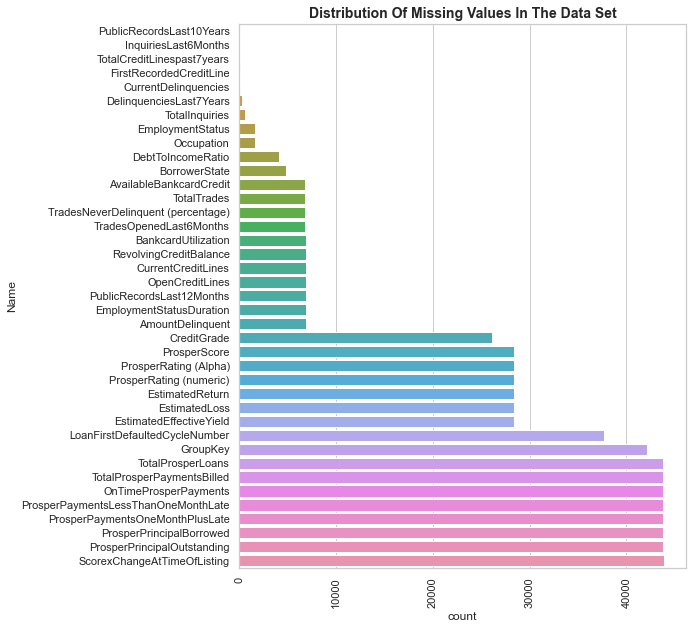

In [5]:
missing_values = df_prosper_loan_substitute.isnull().sum() 
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
sb.barplot(x = 'count', y = 'Name', data=missing_values)
plt.xticks(rotation = 90)
plt.title('Distribution of Missing Values in the Data Set'.title(),fontsize=14,weight='bold');
plt.show()


## 2. Distribution of Loan Status.
An analysis of the count plot for the categorical variable loan status reveals that there are more completed loans than defaults in this dataset.

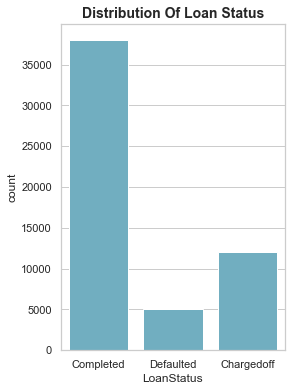

In [6]:
## Distribution of Loan Status
df_prosper_loan_substitute = df_prosper_loan.query('LoanStatus in ["Defaulted", "Completed", "Chargedoff"]')
plt.figure(figsize=(4, 6));
b_color=sb.color_palette()[9]
c_color=sb.color_palette()[2]
sb.countplot(x='LoanStatus', data=df_prosper_loan_substitute, color=b_color);
plt.title('Distribution of Loan Status'.title(),fontsize=14,weight='bold');

## 3. Status of Employment Distribution
According to the distribution of job status, more persons in our dataset are employed than are unemployed.

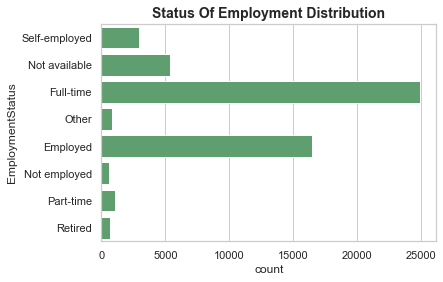

In [7]:
## Status of Employment Distribution
color=sb.color_palette()[2]
sb.countplot(y='EmploymentStatus', data =df_prosper_loan_substitute, color=color);
plt.title('Status of Employment Distribution'.title(),fontsize=14,weight='bold');

## 4. Average Credit Score Distribution
>The lowest and upper limits of the credit score range seem to be left skewed, but after more research, it seems that only a small number of values are below 400 and above, where the majority of the data is concentrated. The distribution for both the upper and lower credit limit appears to follow a normal distribution when replotting with those values only greater than 400. Since the distribution of values in the upper and lower credit score ranges is comparable, using the average of these two columns' values will be simpler.

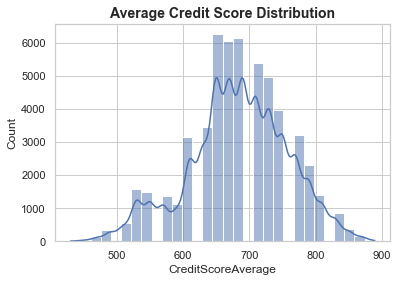

In [8]:
df_prosper_loan_substitute['CreditScoreAverage'] = (df_prosper_loan_substitute.CreditScoreRangeLower + df_prosper_loan_substitute.CreditScoreRangeUpper)/2
sb.histplot(x='CreditScoreAverage', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], bins=30, kde=True);
plt.title('Average Credit Score Distribution'.title(),fontsize=14,weight='bold');

## 5. Ploting how many referrals the borrower had at the time the listing was made:
>The distribution of suggestions appears to be right-skewed, with the majority falling below the threshold of 10. This distribution was not apparent from the initial plot, but it is now obvious after choosing a lower bin size and setting the count axis to a log scale.

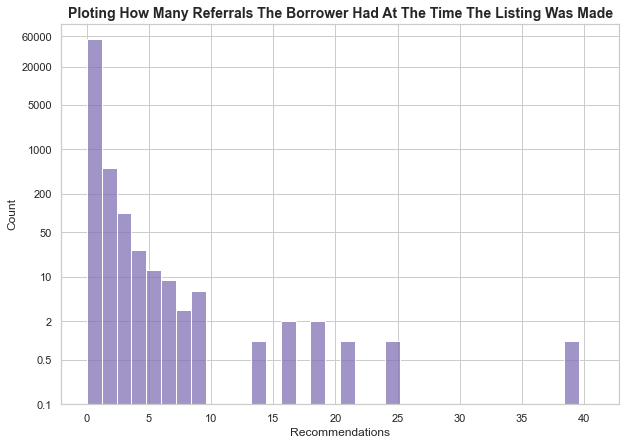

In [9]:
##Ploting how many referrals the borrower had at the time the listing was made:
color=sb.color_palette()[4]
plt.figure(figsize=(10, 7))
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='Recommendations', data=df_prosper_loan_substitute, bins=bins,color=color);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks);
plt.title('Ploting how many referrals the borrower had at the time the listing was made'.title(),fontsize=14,weight='bold');

### 6.In Group vs Loan Status at the moment

 - In contrast to the (6000) finished loans for individuals who are members of a group, the majority of those who do not belong to any group successfully completed their loans (30 000).

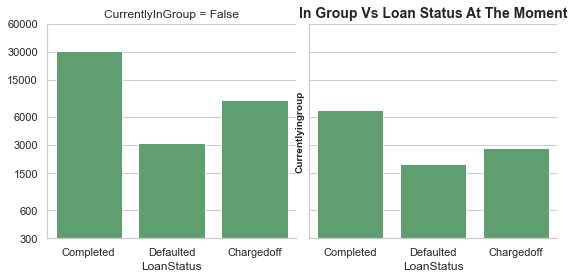

In [10]:
request = df_prosper_loan_substitute.LoanStatus.unique()
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='CurrentlyInGroup', height=4)
g.map(sb.countplot, 'LoanStatus', order=request,color=c_color)
plt.title('In Group vs Loan Status at the moment'.title(),fontsize=14,weight='bold');
plt.ylabel('CurrentlyInGroup'.title(), fontsize = 10, weight = "bold")
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks);



## 7. Isborrowerhomeowner VS Loan Status
>The graph above demonstrates that a borrower's ownership status does not appear to affect whether a loan will be repaid in whole, charged off, or defaulted.


<Figure size 576x720 with 0 Axes>

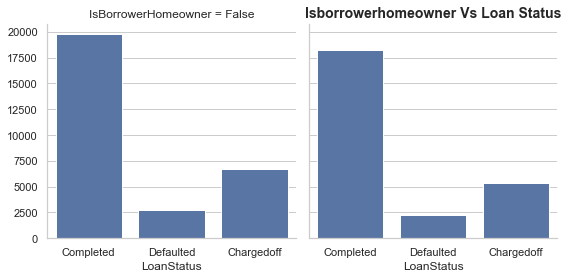

In [11]:
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='IsBorrowerHomeowner', height=4)
g.map(sb.countplot, 'LoanStatus', order=request)
plt.title('Isborrowerhomeowner VS Loan Status'.title(),fontsize=14,weight='bold');

### 8. Prosper Score VS Employement Status:

 - Employed Borrowers receive the highest Prosper rating.
 - The number of Prosper Rated Borrowers in various Employment Statuses differs greatly.

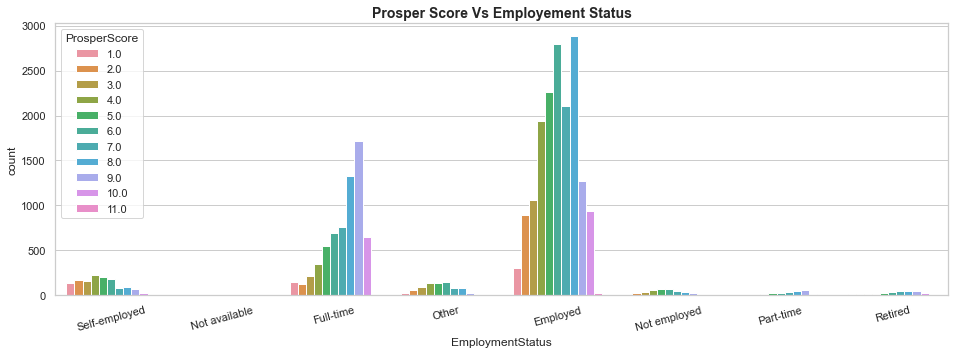

In [12]:
mt_counts=df_prosper_loan_substitute.groupby(['EmploymentStatus','ProsperScore']).size()
mt_counts=mt_counts.reset_index(name='count')
mt_counts = mt_counts.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
mt_counts
plt.figure(figsize = [16,5])
axis = sb.countplot(data = df_prosper_loan_substitute, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.xticks(rotation = 15);
plt.title('Prosper Score VS Employement Status'.title(),fontsize=14,weight='bold');

### 9. Employment situation, Credit score on average, and Loan status
>The graph below supports earlier findings that people who are completely employed prefer to repay their debts, and it also demonstrates that people who are fully employed but default on their loans have lower average credit scores than people who successfully repay their loans. We can also see that those who select "Not available" for their work status are most likely to default, and the majority of them also have average credit scores below 650.

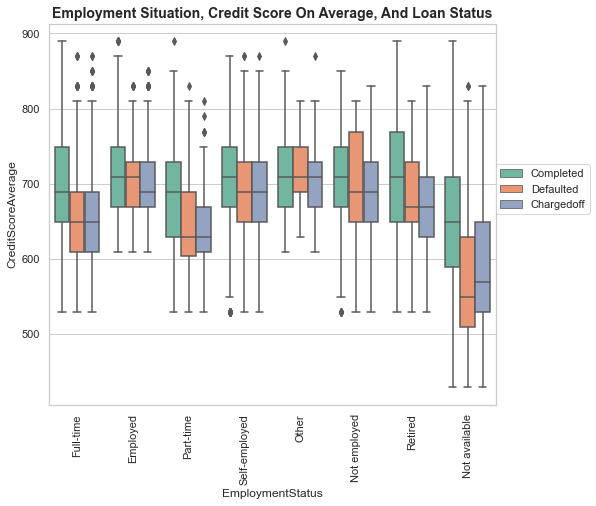

In [13]:
request = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=df_prosper_loan_substitute.query('CreditScoreAverage>=400'), y='CreditScoreAverage', 
           color=c_color, order=request, x='EmploymentStatus', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90);
plt.title('Employment situation, Credit score on average, and Loan status'.title(),fontsize=14,weight='bold');

## 10.Employment state, The number of investments made by friends and Loan status
>Compared to the other categories in our dataset, those who are employed full-time had a higher average investment from friends count.

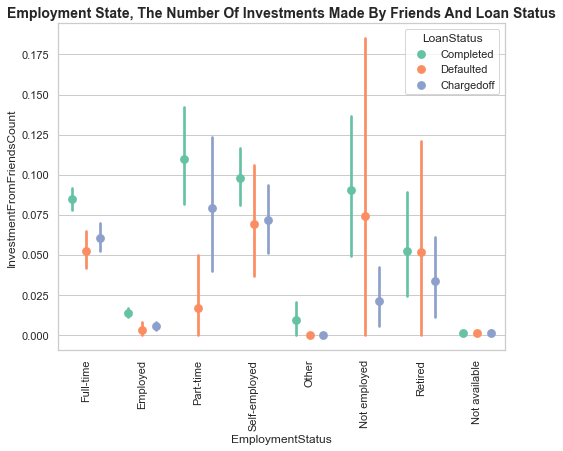

In [14]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=request, palette='Set2')
plt.xticks(rotation=90);
plt.title('Employment state, The number of investments made by friends and Loan status'.title(),fontsize=14,weight='bold');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [3]:
!jupyter nbconvert Part_2_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_2_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 947716 bytes to Part_2_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Ashim\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Ashim\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Ashim\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Ashim\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Ashim\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_fi

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
